### Infinite Nature

In [ ]:
%%shell
echo Fetching code from github...

apt install subversion
svn export --force https://github.com/google-research/google-research/trunk/infinite_nature

rm -f autocruise_input*.pkl
rm -f ckpt.tar.gz
rm -rf ckpt
wget https://storage.googleapis.com/gresearch/infinite_nature_public/autocruise_input1.pkl
wget https://storage.googleapis.com/gresearch/infinite_nature_public/autocruise_input2.pkl
wget https://storage.googleapis.com/gresearch/infinite_nature_public/autocruise_input3.pkl
wget https://storage.googleapis.com/gresearch/infinite_nature_public/ckpt.tar.gz
tar -xf ckpt.tar.gz

echo
echo Installing required dependency...
pip install tensorflow-addons

echo
echo Fetching tf_mesh_renderer and compiling kernels...
cd infinite_nature
rm -rf tf_mesh_renderer
source download_tf_mesh_renderer.sh

In [8]:
%cd infinite_nature/

/content/infinite_nature


In [9]:
import tensorflow as tf
import os
import sys

# Make sure dynamic linking can find tensorflow libraries.
os.system('ldconfig ' + tf.sysconfig.get_lib())

# Make sure python can find our libraries.
sys.path.append('infinite_nature')
sys.path.append('infinite_nature/tf_mesh_renderer/mesh_renderer')

# Make sure the mesh renderer library knows where to load its .so file from.
os.environ['TEST_SRCDIR'] = 'infinite_nature'

In [ ]:
# !python --version
# NOT WORKING YET
!python -m autocruise --output_folder=autocruise --num_steps=100

### Stable Diffusion Model

In [ ]:
%pip install diffusers==0.11.1
%pip install transformers scipy ftfy accelerate

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

pipe = pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

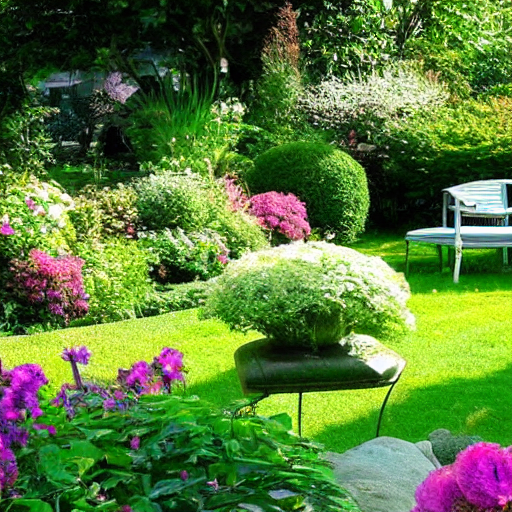

In [ ]:
prompt = "beautiful peaceful garden"
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
# image.save(f"astronaut_rides_horse.png")

# or if you're in a google colab you can directly display it with
image

### CPPN-Pytorch

In [ ]:
%%bash
# Install Conda for Python 3.7    WANT 3.9
# MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
MINICONDA_INSTALLER_SCRIPT=Miniconda3-py39_23.5.2-0-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

In [ ]:
%%bash
# Update Conda
conda install --channel defaults conda python=3.9 --yes  # Changed to 3.9
conda update --channel defaults --all --yes

echo $(python --version)

In [ ]:
# !conda env create -f enviornment_infinite_nature_zero.yml
!conda env update -f environment.yml

In [27]:
# Check what package versions
%%bash
source activate cppn
echo $(python --version)
echo $(pip show torch | grep -E 'Name|Version')
echo $(pip show scipy | grep -E 'Name|Version')
echo $(pip show numpy | grep -E 'Name|Version')
echo $(pip show imageio | grep -E 'Name|Version')
echo $(pip show tifffile | grep -E 'Name|Version')

Python 3.9.13
Name: torch Version: 1.13.1
Name: scipy Version: 1.8.1
Name: numpy Version: 1.21.6
Name: imageio Version: 2.19.3
Name: tifffile Version: 2021.7.2


In [ ]:
!git clone https://github.com/neale/CPPN.git
%cd CPPN
# OR upload the zip file
# !sudo apt-get install unzip
# !unzip CPPN.zip
# %cd CPPN

In [ ]:
!source activate cppn && echo overwrite | python3 cppn.py --walk --x_dim 256 --y_dim 256 --scale 10 --net 32 --c_dim 3 --n 10 --interpolation 50
# echo overwrite | python3 cppn.py --walk --x_dim 256 --y_dim 256 --scale 10 --net 32 --c_dim 3 --n 10 --interpolation 50

In [ ]:
# Create output .mp4 video file
!ffmpeg -framerate 7 -pattern_type glob -i 'trials/*.png' -c:v libx264 -crf 23 output.mp4

In [ ]:
# Display the video
from IPython.display import HTML

HTML("""
    <video width="320" height="240" controls>
        <source src="/content/drive/MyDrive/path/to/video.mp4" type="video/mp4">
    </video>
""")

In [ ]:
# # Downgrade to python 3.8
# !sudo apt-get update -y
# !sudo apt-get install python3.8
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1

# !sudo update-alternatives --config python3

# !apt-get install python3-pip

# !python -m pip install --upgrade pip --user

# !sudo apt-get install python3.8-distutils

### Infinite Nature Zero Model  (Doesn't seem to work)


In [ ]:
# Clone the folder from the repo
%%bash
sudo apt install subversion
SUBDIR=infinite_nature_zero
svn export https://github.com/google-research/google-research/trunk/$SUBDIR

In [ ]:
%cd infinite_nature_zero

In [ ]:
# Clear the PATH
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
# Install Conda 4.12 for Python 3.7    WANT 3.8
%%bash
# MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
MINICONDA_INSTALLER_SCRIPT=Miniconda3-py38_23.5.2-0-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

In [ ]:
# !which conda # should return /usr/local/bin/conda
# !conda --version # should return 4.12.0
!python --version

Python 3.8.17


In [ ]:
# Update Conda
%%bash
conda install --channel defaults conda python=3.8 --yes  # Change to 3.8
conda update --channel defaults --all --yes

In [ ]:
!conda env create -f enviornment_infinite_nature_zero.yml

# !conda env update -n base -f enviornment_infinite_nature_zero.yml
# !conda env update --file enviornment_infinite_nature_zero.yml --prune

In [ ]:
# Must use source activate before each cmd or use %%bash for whole shell
!source activate infinite_nature_zero && which python

/usr/local/envs/infinite_nature_zero/bin/python


In [ ]:
%cd /content/infinite_nature_zero

In [ ]:
!git clone https://github.com/hperrot/splatting.git
%cd splatting
!source activate infinite_nature_zero && pip install -e .
# Needed to have pytorch installed to pip install

In [ ]:
import sys
sys.path.append("/usr/local/lib/python3.8/site-packages")  # CHANGE to 3.8
sys.path

In [ ]:
!git clone https://github.com/rosinality/stylegan2-pytorch
!mv stylegan2_upgrade.patch stylegan2-pytorch
%cd stylegan2-pytorch
!git apply stylegan2_upgrade.patch

In [ ]:
# and copy modifed model.py to models directory.
!cp model.py ../models/networks
# Finally, copy the 'op' folder to models/networks directory.
!cp -r op ../models/networks

In [ ]:
%cd /content/infinite_nature_zero

/content/infinite_nature_zero


In [ ]:
# OPTIONAL ??
!wget https://storage.googleapis.com/gresearch/infinite_nature_zero/infinite_nature_zero_ckpts_data.zip
!unzip infinite_nature_zero_ckpts_data.zip

In [ ]:
!source activate infinite_nature_zero && python -m pvg_lhq-test

Using /root/.cache/torch_extensions/py38_cu113 as PyTorch extensions root...
Emitting ninja build file /root/.cache/torch_extensions/py38_cu113/splatting_cpu/build.ninja...
Building extension module splatting_cpu...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
Loading extension module splatting_cpu...
----------------- Options ---------------
            ada_sky_shift: False                         
             aspect_ratio: 1.0                           
               compositor: splat                         
                crop_size: 128                           
                 is_train: False                         	[default: None]
       load_from_opt_file: False                         
               local_rank: 0                             
                    model: render                        
                     name: infinite-nature-zero          
                  use_dpt:

### Hugging Face Model: damo-vilab/text-to-video-ms-1.7b

In [ ]:
%pip uninstall diffusers --yes
%pip install diffusers

In [ ]:
import torch
from diffusers import DiffusionPipeline
from diffusers.utils import export_to_video

pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.enable_model_cpu_offload()

# memory optimization
pipe.enable_vae_slicing()

In [ ]:
prompt = 'walking through a calm beautiful garden'
video_frames = pipe(prompt, num_frames=64).frames
video_path = export_to_video(video_frames)
video_path

  0%|          | 0/50 [00:00<?, ?it/s]

'/tmp/tmp1s18ppre.mp4'

### Hugging Face Model: cerspense/zeroscope_v2_576w

In [ ]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video

In [ ]:
pipe = DiffusionPipeline.from_pretrained("cerspense/zeroscope_v2_576w", torch_dtype=torch.float16)
# Upscale the video
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

# memory optimization
pipe.unet.enable_forward_chunking(chunk_size=1, dim=1)
pipe.enable_vae_slicing()

prompt = 'walking through a calm beautiful garden'
video_frames = pipe(prompt, num_frames=24).frames
video_path = export_to_video(video_frames)
video_path

text_encoder/model.safetensors not found


  0%|          | 0/50 [00:00<?, ?it/s]

'/tmp/tmp0h_ufxlv.mp4'